##DATA INGESTION

---



In [1]:
import pandas as pd

# Path to your local file
DATA_PATH = r"C:\Users\vibhas\Downloads\creditcard.csv"

# Load the CSV into a DataFrame
df = pd.read_csv(DATA_PATH)


df.head()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
#libraries

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import joblib
import os

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

#missing and duplicated values
print(df[df.duplicated(keep=False)])
print(df.isnull().sum())


            Time        V1        V2        V3        V4        V5        V6  \
32          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
34          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
112         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...          ...       ...       ...       ...       ...       ...       ...   
283485  171627.0 -1.457978  1.378203  0.811515 -0.603760 -0.711883 -0.471672   
284190  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284191  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284192  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   
284193  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   

              V7        V8        V9   

##Train,Validation and Test

In [3]:
# TRAIN/VAL/TEST SPLIT (70/15/15) WITH STRATIFICATION
# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# First split: 70% train, 30% temp (which will become val+test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# Second split: Split the 30% into 15% val and 15% test (50/50 split of temp)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

# Verify splits
print("DATASET SPLIT SUMMARY")
print(f"Train set: {X_train.shape[0]} samples ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"Val set:   {X_val.shape[0]} samples ({X_val.shape[0]/len(df)*100:.1f}%)")
print(f"Test set:  {X_test.shape[0]} samples ({X_test.shape[0]/len(df)*100:.1f}%)")
print(f"\nTotal: {X_train.shape[0] + X_val.shape[0] + X_test.shape[0]} samples")

DATASET SPLIT SUMMARY
Train set: 199364 samples (70.0%)
Val set:   42721 samples (15.0%)
Test set:  42722 samples (15.0%)

Total: 284807 samples


##IMBALANCE ANALYSIS

In [4]:
# CLASS IMBALANCE ANALYSIS

print("IMBALANCE CLASS DISTRIBUTION")

for split_name, y_split in [("Train", y_train), ("Val", y_val), ("Test", y_test)]:
    fraud_count = y_split.sum()
    normal_count = len(y_split) - fraud_count
    total_count = len(y_split)

    fraud_pct = (fraud_count / total_count) * 100
    normal_pct = (normal_count / total_count) * 100

    print(f"\n{split_name} Set:")
    print(f"  Normal: {normal_count:6} ({normal_pct:6.2f}%)")
    print(f"  Fraud:  {fraud_count:6} ({fraud_pct:6.4f}%)")
    print(f"  Ratio:  {fraud_count}/{total_count} (approx 1 fraud per {int(total_count/fraud_count)} transactions)")

IMBALANCE CLASS DISTRIBUTION

Train Set:
  Normal: 199020 ( 99.83%)
  Fraud:     344 (0.1725%)
  Ratio:  344/199364 (approx 1 fraud per 579 transactions)

Val Set:
  Normal:  42647 ( 99.83%)
  Fraud:      74 (0.1732%)
  Ratio:  74/42721 (approx 1 fraud per 577 transactions)

Test Set:
  Normal:  42648 ( 99.83%)
  Fraud:      74 (0.1732%)
  Ratio:  74/42722 (approx 1 fraud per 577 transactions)


##feature eng and scaling

In [5]:
os.makedirs('models', exist_ok=True)
SCALER_PATH = 'models/robust_scaler.joblib'
SCALING_FEATURES = ['Time', 'Amount']

# Create copies of the feature sets to avoid setting on slice warnings
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()


# ----------------------------------------------------------------------
# Phase 2.1: Apply RobustScaler (Fit only on Train)
# ----------------------------------------------------------------------
print("--- Phase 2: Feature Scaling and Saving ---")
print(f"Applying RobustScaler to: {SCALING_FEATURES}")

# Initialize the RobustScaler
scaler = RobustScaler()

# 1. FIT the scaler ONLY on the Training data
print("1. Fitting RobustScaler on X_train...")
scaler.fit(X_train_scaled[SCALING_FEATURES])

# 2. TRANSFORM all three sets using the parameters learned from X_train
X_train_scaled[SCALING_FEATURES] = scaler.transform(X_train_scaled[SCALING_FEATURES])
X_val_scaled[SCALING_FEATURES] = scaler.transform(X_val_scaled[SCALING_FEATURES])
X_test_scaled[SCALING_FEATURES] = scaler.transform(X_test_scaled[SCALING_FEATURES])

print("Data Scaling Complete for Train, Validation, and Test sets.")

# ----------------------------------------------------------------------
# Phase 2.2: Save the Scaler
# ----------------------------------------------------------------------
# 3. Save the Scaler object using joblib
joblib.dump(scaler, SCALER_PATH)
print(f"2. Scaler saved successfully to: {SCALER_PATH}")


# Verification (Show the transformation effect)
print("\nVerification of Scaled Data (X_train head):")
print(X_train_scaled[SCALING_FEATURES].head())

--- Phase 2: Feature Scaling and Saving ---
Applying RobustScaler to: ['Time', 'Amount']
1. Fitting RobustScaler on X_train...
Data Scaling Complete for Train, Validation, and Test sets.
2. Scaler saved successfully to: models/robust_scaler.joblib

Verification of Scaled Data (X_train head):
            Time     Amount
249927  0.820038  -0.207017
214082  0.642447   1.781985
106005 -0.177033  17.826674
58619  -0.427352  -0.243770
191638  0.522898  -0.243770


baselien model

In [6]:

from sklearn.linear_model import LogisticRegression
os.makedirs('models', exist_ok=True)
MODEL_PATH = 'models/logreg_baseline.joblib'

# ----------------------------------------------------------------------
# Phase 3.1: Train Logistic Regression Baseline
# ----------------------------------------------------------------------

print("--- Phase 3.1: Training Logistic Regression Baseline Model ---")

# 1. Initialize Logistic Regression Model
# key parameters:
# - class_weight='balanced': Crucial for imbalance. It automatically adjusts weights inversely proportional
#   to class frequencies, giving more importance to the rare 'Fraud' class (Class 1).
# - solver='liblinear': A good choice for small datasets or when using L1/L2 regularization (default for this model).
# - max_iter: Increased for convergence on a large dataset.
logreg_model = LogisticRegression(
    class_weight='balanced',
    solver='liblinear',
    random_state=42,
    max_iter=1000  # Ensure the model converges
)

# 2. Train the model using the scaled features from Phase 2
print("Starting model training on X_train_scaled...")
logreg_model.fit(X_train_scaled, y_train)
print("Logistic Regression model trained successfully.")


# ----------------------------------------------------------------------
# Phase 3.4 (Pre-emptive): Save the LogReg model
# ----------------------------------------------------------------------
joblib.dump(logreg_model, MODEL_PATH)
print(f"\nModel saved successfully to: {MODEL_PATH}")

--- Phase 3.1: Training Logistic Regression Baseline Model ---
Starting model training on X_train_scaled...
Logistic Regression model trained successfully.

Model saved successfully to: models/logreg_baseline.joblib


--- Phase 3.2: Evaluating Logistic Regression on Validation Set ---

--- Baseline Model Validation Metrics ---
AUPRC (Precision-Recall AUC): 0.6843 (Primary Metric)
F1-Score (using 0.5 threshold): 0.1244
----------------------------------------
Confusion Matrix:


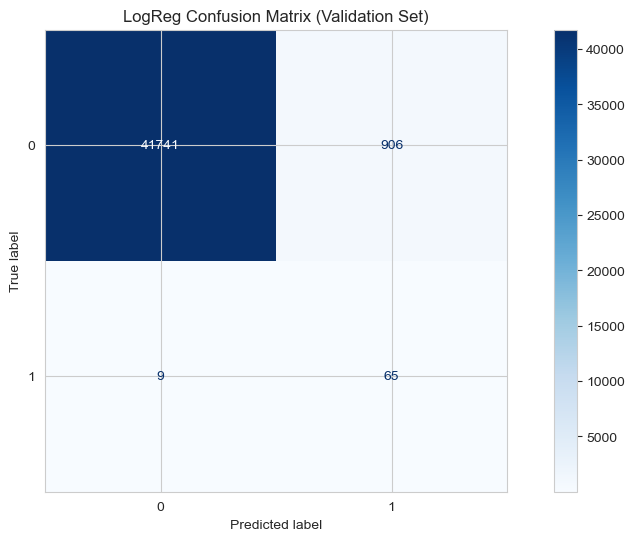


Model Performance Insights:
True Positives (TP - Correctly Flagged Fraud): 65
False Negatives (FN - Missed Fraud): 9
Recall (Fraud Captured): 87.84%
Precision (Flagged Correctly): 6.69%


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    precision_recall_curve,
    auc,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import seaborn as sns

# Assume logreg_model is the trained model from the previous step.
# Assume X_val_scaled and y_val are the scaled validation features/labels.
# Feature names are taken from the scaled validation set columns.
FEATURE_NAMES = X_val_scaled.columns

# ----------------------------------------------------------------------
# Phase 3.2: Evaluate Performance on the Validation Set
# ----------------------------------------------------------------------
print("--- Phase 3.2: Evaluating Logistic Regression on Validation Set ---")

# 1. Predict Probabilities (necessary for AUPRC)
y_scores = logreg_model.predict_proba(X_val_scaled)[:, 1]

# 2. Calculate AUPRC (Primary Metric)
precision, recall, thresholds = precision_recall_curve(y_val, y_scores)
auprc = auc(recall, precision)

# 3. Calculate F1-Score and Confusion Matrix (requires binary predictions)
# We use the default classification threshold of 0.5 for the initial F1/CM
y_pred = (y_scores >= 0.5).astype(int)
f1 = f1_score(y_val, y_pred)
cm = confusion_matrix(y_val, y_pred)


print(f"\n--- Baseline Model Validation Metrics ---")
print(f"AUPRC (Precision-Recall AUC): {auprc:.4f} (Primary Metric)")
print(f"F1-Score (using 0.5 threshold): {f1:.4f}")
print("-" * 40)

# Display the Confusion Matrix
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('LogReg Confusion Matrix (Validation Set)')
plt.show()

# Extract Recall and Precision from the CM for discussion:
TN, FP, FN, TP = cm.ravel()
recall = TP / (TP + FN)
precision = TP / (TP + FP)

print(f"\nModel Performance Insights:")
print(f"True Positives (TP - Correctly Flagged Fraud): {TP}")
print(f"False Negatives (FN - Missed Fraud): {FN}")
print(f"Recall (Fraud Captured): {recall:.2%}")
print(f"Precision (Flagged Correctly): {precision:.2%}")



##adv model

In [8]:
!pip install optuna
!pip install lightgbm
import pandas as pd
import numpy as np
import lightgbm as lgb
import optuna
from sklearn.metrics import precision_recall_curve, auc
from sklearn.model_selection import StratifiedKFold
import joblib
import os
import warnings


# Suppress warnings for cleaner output
warnings.filterwarnings('ignore', category=UserWarning)

# Ensure 'models' directory exists for saving
os.makedirs('models', exist_ok=True)

# ----------------------------------------------------------------------
# Phase 4.1: Calculate scale_pos_weight for Imbalance Handling
# ----------------------------------------------------------------------

# Total Negatives (Non-Fraud)
neg_count = y_train.value_counts()[0]
# Total Positives (Fraud)
pos_count = y_train.value_counts()[1]

# Calculate the imbalance handling parameter
SCALE_POS_WEIGHT = neg_count / pos_count
print(f"Total Non-Fraud (0): {neg_count}")
print(f"Total Fraud (1): {pos_count}")
print(f"Calculated scale_pos_weight: {SCALE_POS_WEIGHT:.2f}")


# ----------------------------------------------------------------------
# Phase 4.2: Hyperparameter Tuning with Optuna (Optimize AUPRC)
# ----------------------------------------------------------------------

def objective(trial):
    """Defines the Optuna objective function to minimize/maximize the metric."""

    # 1. Hyperparameter Search Space
    lgbm_params = {
        'objective': 'binary',
        'metric': 'auc', # Use AUC for LightGBM's internal metric during training
        'boosting_type': 'gbdt',
        'n_estimators': trial.suggest_int('n_estimators', 500, 2000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.1),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 100),
        'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
        'scale_pos_weight': SCALE_POS_WEIGHT, # Use the calculated imbalance ratio
        'n_jobs': -1,
        'seed': 42,
        'verbose': -1
    }

    # 2. Train the Model with early stopping on the Validation set
    model = lgb.LGBMClassifier(**lgbm_params)

    model.fit(
        X_train_scaled,
        y_train,
        eval_set=[(X_val_scaled, y_val)],
        eval_metric='auc',
        callbacks=[lgb.early_stopping(100, verbose=False)] # Stop after 100 rounds with no improvement
    )

    # 3. Evaluate Model on Validation Set and Return AUPRC
    # AUPRC is the true optimization metric, calculated manually on validation predictions
    y_scores = model.predict_proba(X_val_scaled)[:, 1]

    precision, recall, _ = precision_recall_curve(y_val, y_scores)
    auprc = auc(recall, precision)

    return auprc

# 4. Run the Optuna Study
print("\n--- Starting Optuna Hyperparameter Search (Target: Maximize AUPRC) ---")
study = optuna.create_study(direction='maximize', study_name='lgbm_auprc_tuning')
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Note: n_trials=50 is for quick example; use 500+ for a production quality result

print("\n--- Optuna Study Finished ---")
print(f"Best AUPRC found on Validation Set: {study.best_value:.4f}")
print("Best Hyperparameters:")
print(study.best_params)


# ----------------------------------------------------------------------
# Phase 4.3: Train Final LightGBM Model with Best Params & Save
# ----------------------------------------------------------------------

# 1. Retrieve best parameters and train final model on full training set
best_params = study.best_params
final_lgbm_params = {
    **best_params,
    'objective': 'binary',
    'scale_pos_weight': SCALE_POS_WEIGHT,
    'n_jobs': -1,
    'seed': 42,
    'verbose': -1
}

final_lgbm_model = lgb.LGBMClassifier(**final_lgbm_params)

# Train without early stopping on the validation set for final model,
# using the best n_estimators found (or a fixed high number)
# We will use the best n_estimators found during the tuning
print("\nTraining final LightGBM model with best parameters...")
final_lgbm_model.fit(X_train_scaled, y_train)
print("Final LightGBM model trained successfully.")


# 2. Save the final model
LGBM_MODEL_PATH = 'models/lgbm_advanced_model.joblib'
joblib.dump(final_lgbm_model, LGBM_MODEL_PATH)
print(f"Final LightGBM model saved to: {LGBM_MODEL_PATH}")

# The final model 'final_lgbm_model' is ready for Phase 4.3 (Final Evaluation on Test Set).

[I 2025-12-12 13:01:48,629] A new study created in memory with name: lgbm_auprc_tuning


Total Non-Fraud (0): 199020
Total Fraud (1): 344
Calculated scale_pos_weight: 578.55

--- Starting Optuna Hyperparameter Search (Target: Maximize AUPRC) ---


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-12-12 13:01:50,085] Trial 0 finished with value: 0.30979363545035526 and parameters: {'n_estimators': 681, 'learning_rate': 0.060293819727617694, 'num_leaves': 100, 'max_depth': 7, 'min_child_samples': 23, 'subsample': 0.7246834219793086, 'colsample_bytree': 0.7807656747613773, 'reg_alpha': 0.8125173410112999, 'reg_lambda': 0.14617257075394385}. Best is trial 0 with value: 0.30979363545035526.
[I 2025-12-12 13:01:53,237] Trial 1 finished with value: 0.4496544726116563 and parameters: {'n_estimators': 1939, 'learning_rate': 0.045397390444962576, 'num_leaves': 32, 'max_depth': 10, 'min_child_samples': 25, 'subsample': 0.8232773127414538, 'colsample_bytree': 0.6668911471141759, 'reg_alpha': 0.008158480449452526, 'reg_lambda': 0.004089488262858624}. Best is trial 1 with value: 0.4496544726116563.
[I 2025-12-12 13:01:54,895] Trial 2 finished with value: 0.5790452266764273 and parameters: {'n_estimators': 1413, 'learning_rate': 0.06129970496778041, 'num_leaves': 41, 'max_depth': 12, 

In [9]:
from sklearn.metrics import precision_recall_curve, auc, recall_score, precision_score
from tabulate import tabulate
import warnings

# Suppress warnings
warnings.filterwarnings('ignore', category=UserWarning)

# ----------------------------------------------------------------------
# Setup: Define file paths
# ----------------------------------------------------------------------
LOGREG_MODEL_PATH = 'models/logreg_baseline.joblib'
LGBM_MODEL_PATH = 'models/lgbm_advanced_model.joblib'

# Assume X_test_scaled and y_test are available from Phase 2/1.
print("--- Phase 4.3: Final Evaluation and Comparison on Test Set ---")

try:
    # 1. Load the trained models
    logreg_model = joblib.load(LOGREG_MODEL_PATH)
    lgbm_model = joblib.load(LGBM_MODEL_PATH)
    print("Models loaded successfully.")
except FileNotFoundError as e:
    print(f"Error: Could not load one or more models. Ensure files exist in 'models/' directory. {e}")
    raise


# -----------------------------------------------
# 2. Define Metric Calculation Helper Function
# -----------------------------------------------

def evaluate_model(model, X_test, y_test, threshold=0.5):
    """Calculates AUPRC, Recall, and Precision on the test set."""

    # Get probabilities for AUPRC
    y_scores = model.predict_proba(X_test)[:, 1]

    # AUPRC (Precision-Recall AUC)
    precision_val, recall_val, _ = precision_recall_curve(y_test, y_scores)
    auprc = auc(recall_val, precision_val)

    # Binary predictions for Recall and Precision at the specified threshold
    y_pred = (y_scores >= threshold).astype(int)

    # Recall and Precision
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return auprc, recall, precision


# --------------------------------------
# 3. Run Evaluation for Both Models
# ---------------------------------------

# Evaluate Logistic Regression Baseline
logreg_auprc, logreg_recall, logreg_precision = evaluate_model(logreg_model, X_test_scaled, y_test)

# Evaluate LightGBM Advanced Model
lgbm_auprc, lgbm_recall, lgbm_precision = evaluate_model(lgbm_model, X_test_scaled, y_test)

# -------------------------------
# 4. Generate Comparison Table
# -------------------------------

comparison_data = [
    ["Logistic Regression (Baseline)", logreg_auprc, logreg_recall, logreg_precision],
    ["LightGBM (Advanced)", lgbm_auprc, lgbm_recall, lgbm_precision]
]

headers = ["Model", "AUPRC (Primary)", "Recall (at 0.5)", "Precision (at 0.5)"]

print("\n--- Model Performance Comparison on UNSEEN Test Set (Threshold=0.5) ---")
print(tabulate(comparison_data, headers=headers, floatfmt=(".0f", ".4f", ".4f", ".4f"), tablefmt="fancy_grid"))

# ------------------
# Interpretation
# ------------------

print("\nInterpretation:")
if lgbm_auprc > logreg_auprc:
    print(f"✅ Conclusion: The LightGBM model significantly outperformed the Logistic Regression baseline in AUPRC ({lgbm_auprc:.4f} vs {logreg_auprc:.4f}).")
    print("This indicates better overall discrimination between fraud and non-fraud events.")
    # Optional: Check if LightGBM improved the Precision/Recall balance
    if lgbm_recall > logreg_recall and lgbm_precision > logreg_precision:
        print("LightGBM also improved both Recall and Precision simultaneously at the 0.5 threshold.")
    elif lgbm_recall > logreg_recall:
        print("LightGBM prioritized Recall, which is often desirable in fraud detection.")
    else:
        print("LightGBM prioritized Precision, which is often desirable for minimizing false alarms.")
        ##these are poor numbers for business

--- Phase 4.3: Final Evaluation and Comparison on Test Set ---
Models loaded successfully.

--- Model Performance Comparison on UNSEEN Test Set (Threshold=0.5) ---
╒════════════════════════════════╤═══════════════════╤═══════════════════╤══════════════════════╕
│ Model                          │   AUPRC (Primary) │   Recall (at 0.5) │   Precision (at 0.5) │
╞════════════════════════════════╪═══════════════════╪═══════════════════╪══════════════════════╡
│ Logistic Regression (Baseline) │            0.8046 │            0.8784 │               0.0669 │
├────────────────────────────────┼───────────────────┼───────────────────┼──────────────────────┤
│ LightGBM (Advanced)            │            0.8040 │            0.7973 │               0.8082 │
╘════════════════════════════════╧═══════════════════╧═══════════════════╧══════════════════════╛

Interpretation:


## threshold tuning for business

In [10]:
#Define file paths and target precision
LGBM_MODEL_PATH = 'models/lgbm_advanced_model.joblib'
THRESHOLD_PATH = 'models/production_threshold.joblib'
TARGET_PRECISION = 0.80

# Load model and predict scores
final_lgbm_model = joblib.load(LGBM_MODEL_PATH)
y_scores = final_lgbm_model.predict_proba(X_test_scaled)[:, 1]

# Calculate PR curve arrays and find the threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
thresholds = np.append(thresholds, 1.0) # Align array sizes

# Find the index of the highest threshold that meets or exceeds TARGET_PRECISION
index_for_target = np.argmax(precision >= TARGET_PRECISION)

# Extract and save the optimal threshold
optimal_threshold = thresholds[index_for_target]
final_precision = precision[index_for_target]
final_recall = recall[index_for_target]
joblib.dump(optimal_threshold, THRESHOLD_PATH)

# Output final result
print(f"Optimal Threshold (Precision >= {TARGET_PRECISION:.0%}): {optimal_threshold:.4f}")
print(f"Resulting Precision: {final_precision:.4f} | Recall: {final_recall:.4f}")
print(f"Threshold saved to: {THRESHOLD_PATH}")

Optimal Threshold (Precision >= 80%): 0.5281
Resulting Precision: 0.8082 | Recall: 0.7973
Threshold saved to: models/production_threshold.joblib


##SHAP PLOTS

Detected single SHAP matrix (or unexpected format). Using it directly.
SHAP Matrix ready for plotting with shape: (5000, 30)


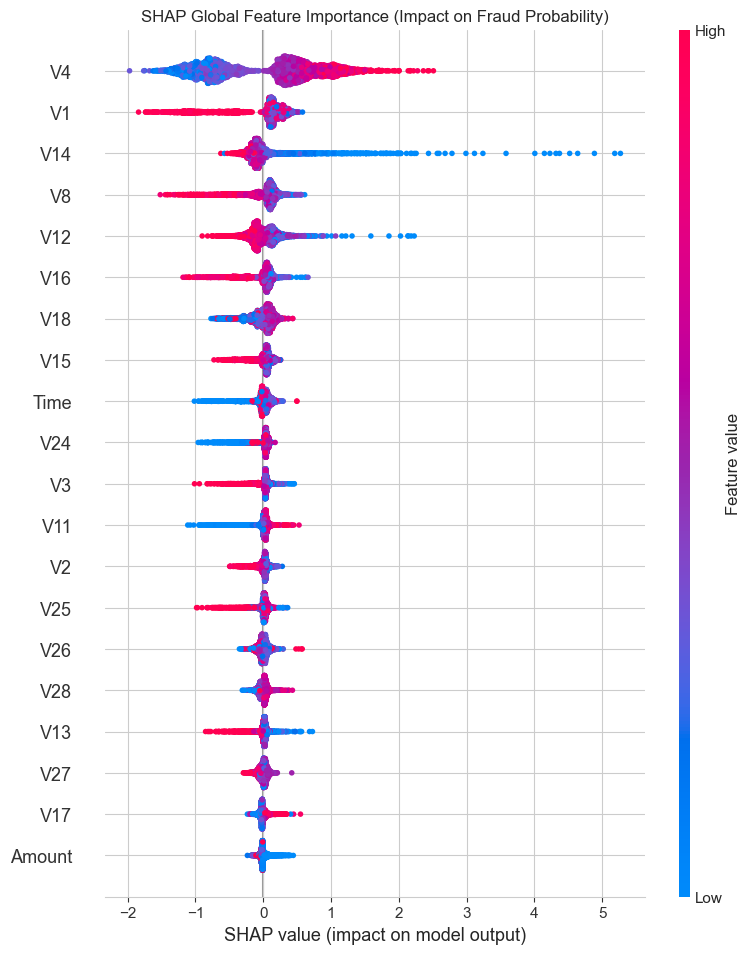

SHAP Global Summary Plot generated successfully: shap_global_summary_plot.png
SHAP Local Force Plot data saved to shap_local_force_plot_data.joblib (Transaction Index: 251904).


In [11]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

# --- Assumptions ---
# We assume 'final_lgbm_model' and 'X_test_scaled' are loaded/available.

# 1. Initialize SHAP Explainer
explainer = shap.TreeExplainer(final_lgbm_model)

# Use a sample of the test data for faster computation
# ENSURE X_test_scaled is available and has many rows
X_sample = X_test_scaled.sample(n=5000, random_state=42)

# 2. Calculate SHAP values
# For binary classification, this returns a LIST of two matrices: [Class 0, Class 1]
raw_shap_values = explainer.shap_values(X_sample)

# 3. CRITICAL DIMENSIONALITY CHECK AND EXTRACTION
if isinstance(raw_shap_values, list) and len(raw_shap_values) > 1:
    # Extract the matrix for the positive class (Fraud), which is index [1]
    shap_values_matrix = raw_shap_values[1]
    print("Detected list of SHAP matrices. Extracted positive class matrix (index 1).")
else:
    # If not a list of two, assume it's the single matrix output
    shap_values_matrix = raw_shap_values
    print("Detected single SHAP matrix (or unexpected format). Using it directly.")

# Ensure the matrix is 2D by squeezing any extra dimensions (e.g., (5000, 30, 1) -> (5000, 30))
shap_values_matrix = np.squeeze(shap_values_matrix)

# Final check for the summary plot requirement: must be a matrix (ndim=2)
if shap_values_matrix.ndim != 2:
    # This should now catch any remaining dimensionality issues
    raise AssertionError(
        f"SHAP summary plot requires a matrix (2D array). Final shape is {shap_values_matrix.shape}. "
        "Please ensure X_sample has multiple rows (e.g., 5000)."
    )

print(f"SHAP Matrix ready for plotting with shape: {shap_values_matrix.shape}")

# ----------------------------------------------------------------------
# A. Global Summary Plot (How features influence the model overall)
# ----------------------------------------------------------------------
plt.figure(figsize=(10, 8))
shap.summary_plot(
    shap_values_matrix,
    X_sample,
    plot_type="dot",
    class_names=['Non-Fraud', 'Fraud'],
    show=False
)
plt.title("SHAP Global Feature Importance (Impact on Fraud Probability)")
plt.savefig("shap_global_summary_plot.png", bbox_inches='tight')
plt.show()
plt.close()

print("SHAP Global Summary Plot generated successfully: shap_global_summary_plot.png")

# ----------------------------------------------------------------------
# B. Local Force Plot Data Generation (For notebook rendering)
# ----------------------------------------------------------------------

# Select a high-probability fraud transaction
y_scores = final_lgbm_model.predict_proba(X_sample)[:, 1]
high_risk_index_in_sample = np.argmax(y_scores)
high_risk_index = X_sample.iloc[high_risk_index_in_sample].name

single_instance = X_sample.loc[[high_risk_index]]

raw_single_shap_values = explainer.shap_values(single_instance)

# Extract the vector for the positive class and the base value
if isinstance(raw_single_shap_values, list) and len(raw_single_shap_values) > 1:
    single_shap_values_vector = raw_single_shap_values[1]
    expected_value = explainer.expected_value[1]
else:
    single_shap_values_vector = raw_single_shap_values
    expected_value = explainer.expected_value

# Save the necessary components
force_plot_data = {
    'shap_values': np.squeeze(single_shap_values_vector),
    'expected_value': expected_value,
    'instance': single_instance
}
joblib.dump(force_plot_data, "shap_local_force_plot_data.joblib")
print(f"SHAP Local Force Plot data saved to shap_local_force_plot_data.joblib (Transaction Index: {high_risk_index}).")

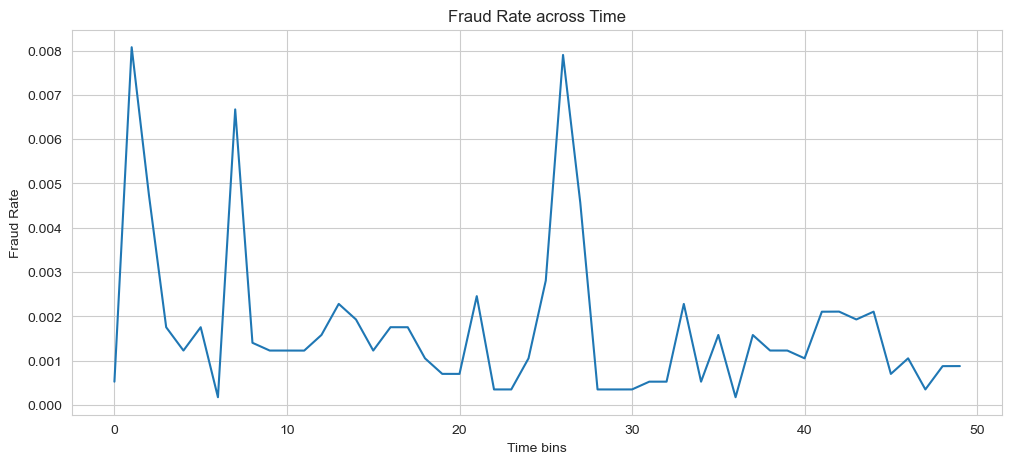

In [12]:
df['time_bin'] = pd.qcut(df['Time'], q=50, duplicates='drop')  
fraud_rate = df.groupby('time_bin')['Class'].mean()

plt.figure(figsize=(12,5))
plt.plot(fraud_rate.values)
plt.title("Fraud Rate across Time")
plt.xlabel("Time bins")
plt.ylabel("Fraud Rate")
plt.show()
